# Plots to Check Your Code

Consider the code for Tempurature modelling

In [1]:
import os
import math
import numpy as np
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

def make_A(k):
    """Create the matrix for the temperature problem on a k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
    Outputs:
      A: the sparse k**2-by-k**2 matrix representing the finite difference approximation to Poisson's equation.
    """
    # First make a list with one triple (row, column, value) for each nonzero element of A
    triples = []
    for i in range(k):
        for j in range(k):
            # what row of the matrix is grid point (i,j)?
            row = j + i*k
            # the diagonal element in this row
            triples.append((row, row, 4.0))
            # connect to left grid neighbor
            if j > 0:
                triples.append((row, row - 1, -1.0))
            # ... right neighbor
            if j < k - 1:
                triples.append((row, row + 1, -1.0))
            # ... neighbor above
            if i > 0:
                triples.append((row, row - k, -1.0))
            # ... neighbor below
            if i < k - 1:
                triples.append((row, row + k, -1.0))
    
    # Finally convert the list of triples to a scipy sparse matrix
    ndim = k*k
    rownum = [t[0] for t in triples]
    colnum = [t[1] for t in triples]
    values = [t[2] for t in triples]
    A = sparse.csr_matrix((values, (rownum, colnum)), shape = (ndim, ndim))
    
    return A

def make_b(k, top = 0, bottom = 0, left = 0, right = 0):
    """Create the right-hand side for the temperature problem on a k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
      top: list of k values for top boundary (optional, defaults to 0)
      bottom: list of k values for bottom boundary (optional, defaults to 0)
      left: list of k values for top boundary (optional, defaults to 0)
      right: list of k values for top boundary (optional, defaults to 0)
    Outputs:
      b: the k**2 element vector (as a numpy array) for the rhs of the Poisson equation with given boundary conditions
    """
    # Start with a vector of zeros
    ndim = k*k
    b = np.zeros(shape = ndim)
    
    # Fill in the four boundaries as appropriate
    b[0        : k       ] += top
    b[ndim - k : ndim    ] += bottom
    b[0        : ndim : k] += left
    b[k-1      : ndim : k] += right
    
    return b


def radiator(k, width = .3, temperature = 100.):
    """Create one wall with a radiator
    Parameters: 
      k: number of grid points in each dimension; length of the wall.
      width: width of the radiator as a fraction of length of the wall (defaults to 0.2)
      temperature: temperature of the radiator (defaults to 100)
    Outputs:
      wall: the k element vector (as a numpy array) for the boundary conditions at the wall
    """
    rad_start = int(k * (0.5 - width/2))
    rad_end = int(k * (0.5 + width/2))
    wall = np.zeros(k)
    wall[rad_start : rad_end] = temperature
    
    return wall

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
k = 100
rad_wall = radiator(k)
A = make_A(k)
b = make_b(k, right = rad_wall)
A.shape

(10000, 10000)

This is the output we expect

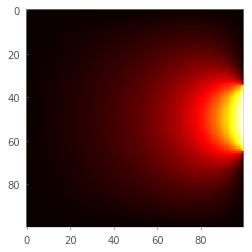

In [3]:
t = spla.spsolve(A,b)
T = t.reshape(k,k)

plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.savefig("tempProblem.png", format='png', bbox_inches='tight')

In [4]:
print(T)

[[ 0.00474022  0.00948457  0.01423718 ...,  0.10273454  0.06885361
   0.03453673]
 [ 0.00947631  0.01896087  0.02846197 ...,  0.20611376  0.13814316
   0.0692933 ]
 [ 0.01420413  0.02842065  0.04266197 ...,  0.31079309  0.20831198
   0.10449331]
 ..., 
 [ 0.01420413  0.02842065  0.04266197 ...,  0.31079309  0.20831198
   0.10449331]
 [ 0.00947631  0.01896087  0.02846197 ...,  0.20611376  0.13814316
   0.0692933 ]
 [ 0.00474022  0.00948457  0.01423718 ...,  0.10273454  0.06885361
   0.03453673]]


Now let's introduce a bug into one of the functions

In [5]:
def make_b(k, top = 0, bottom = 0, left = 0, right = 0):
    """Create the right-hand side for the temperature problem on a k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
      top: list of k values for top boundary (optional, defaults to 0)
      bottom: list of k values for bottom boundary (optional, defaults to 0)
      left: list of k values for top boundary (optional, defaults to 0)
      right: list of k values for top boundary (optional, defaults to 0)
    Outputs:
      b: the k**2 element vector (as a numpy array) for the rhs of the Poisson equation with given boundary conditions
    """
    # Start with a vector of zeros
    ndim = k*k
    b = np.zeros(shape = ndim)
    
    # Fill in the four boundaries as appropriate
    b[0        : k       ] += top
    b[ndim - k : ndim    ] += bottom
    b[0        : ndim : k] += left
    b[k-1      : ndim : k] -= right         # < ---------- BUG IS HERE
    
    return b

When we run the code again, we notice that the coldest part of the room is the radiator.

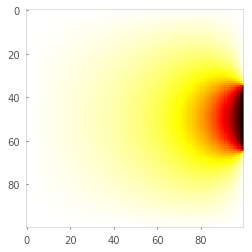

In [6]:
k = 100
rad_wall = radiator(k)
A = make_A(k)
b = make_b(k, right = rad_wall)
A.shape

t = spla.spsolve(A,b)
T = t.reshape(k,k)

plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.savefig("tempProblem_bug.png", format='png', bbox_inches='tight')